Задание   
Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
    - Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
    - Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
    - Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
    - Обучите модель на обучающем наборе данных.

3. Оценка модели:
    - Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

4. Интерпретация результатов:
    - Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.
    - Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.


In [523]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [524]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## - Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [526]:
# проверяем на отсутствующие значения
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [527]:
# Количество уникальных значений
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

<Axes: ylabel='Diabetes'>

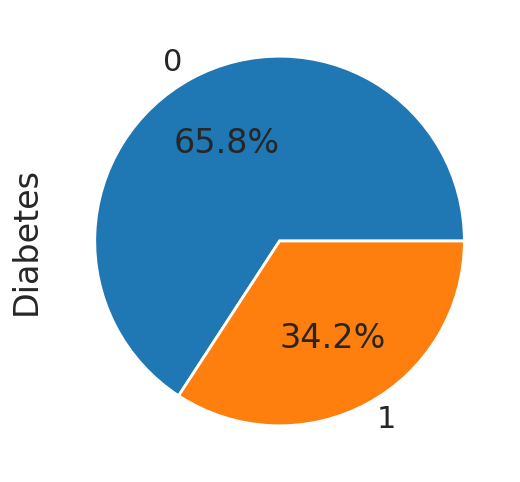

In [528]:
# Смотрим на дисбаланс
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie', y = "Outcome", label = "Diabetes", autopct='%1.1f%%')

<Axes: xlabel='Age', ylabel='count'>

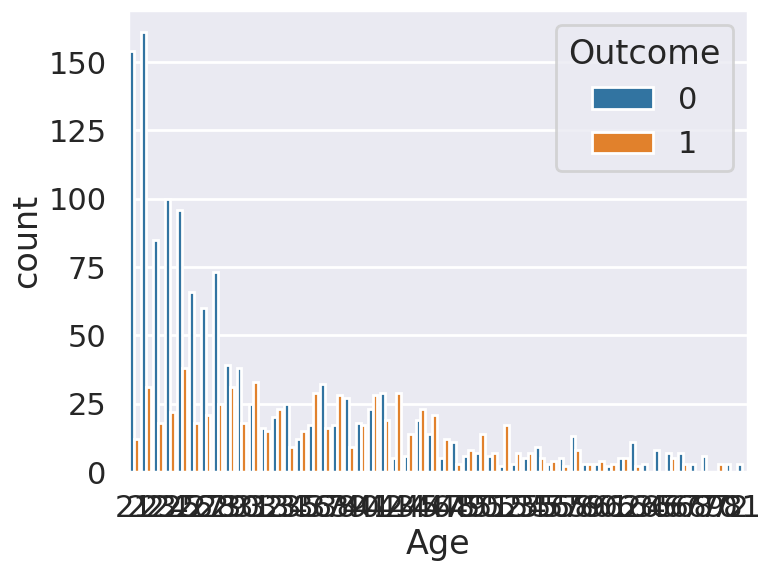

In [529]:
# Смотрим на дисбалансы по возрастам
sns.countplot(x='Age', hue='Outcome', data=df)

#### Видим, что есть дисбалансы по возрастам, при малых значениях возраста перекос в сторону отсутствяи диабета (0), средний возраст наоборот (1)

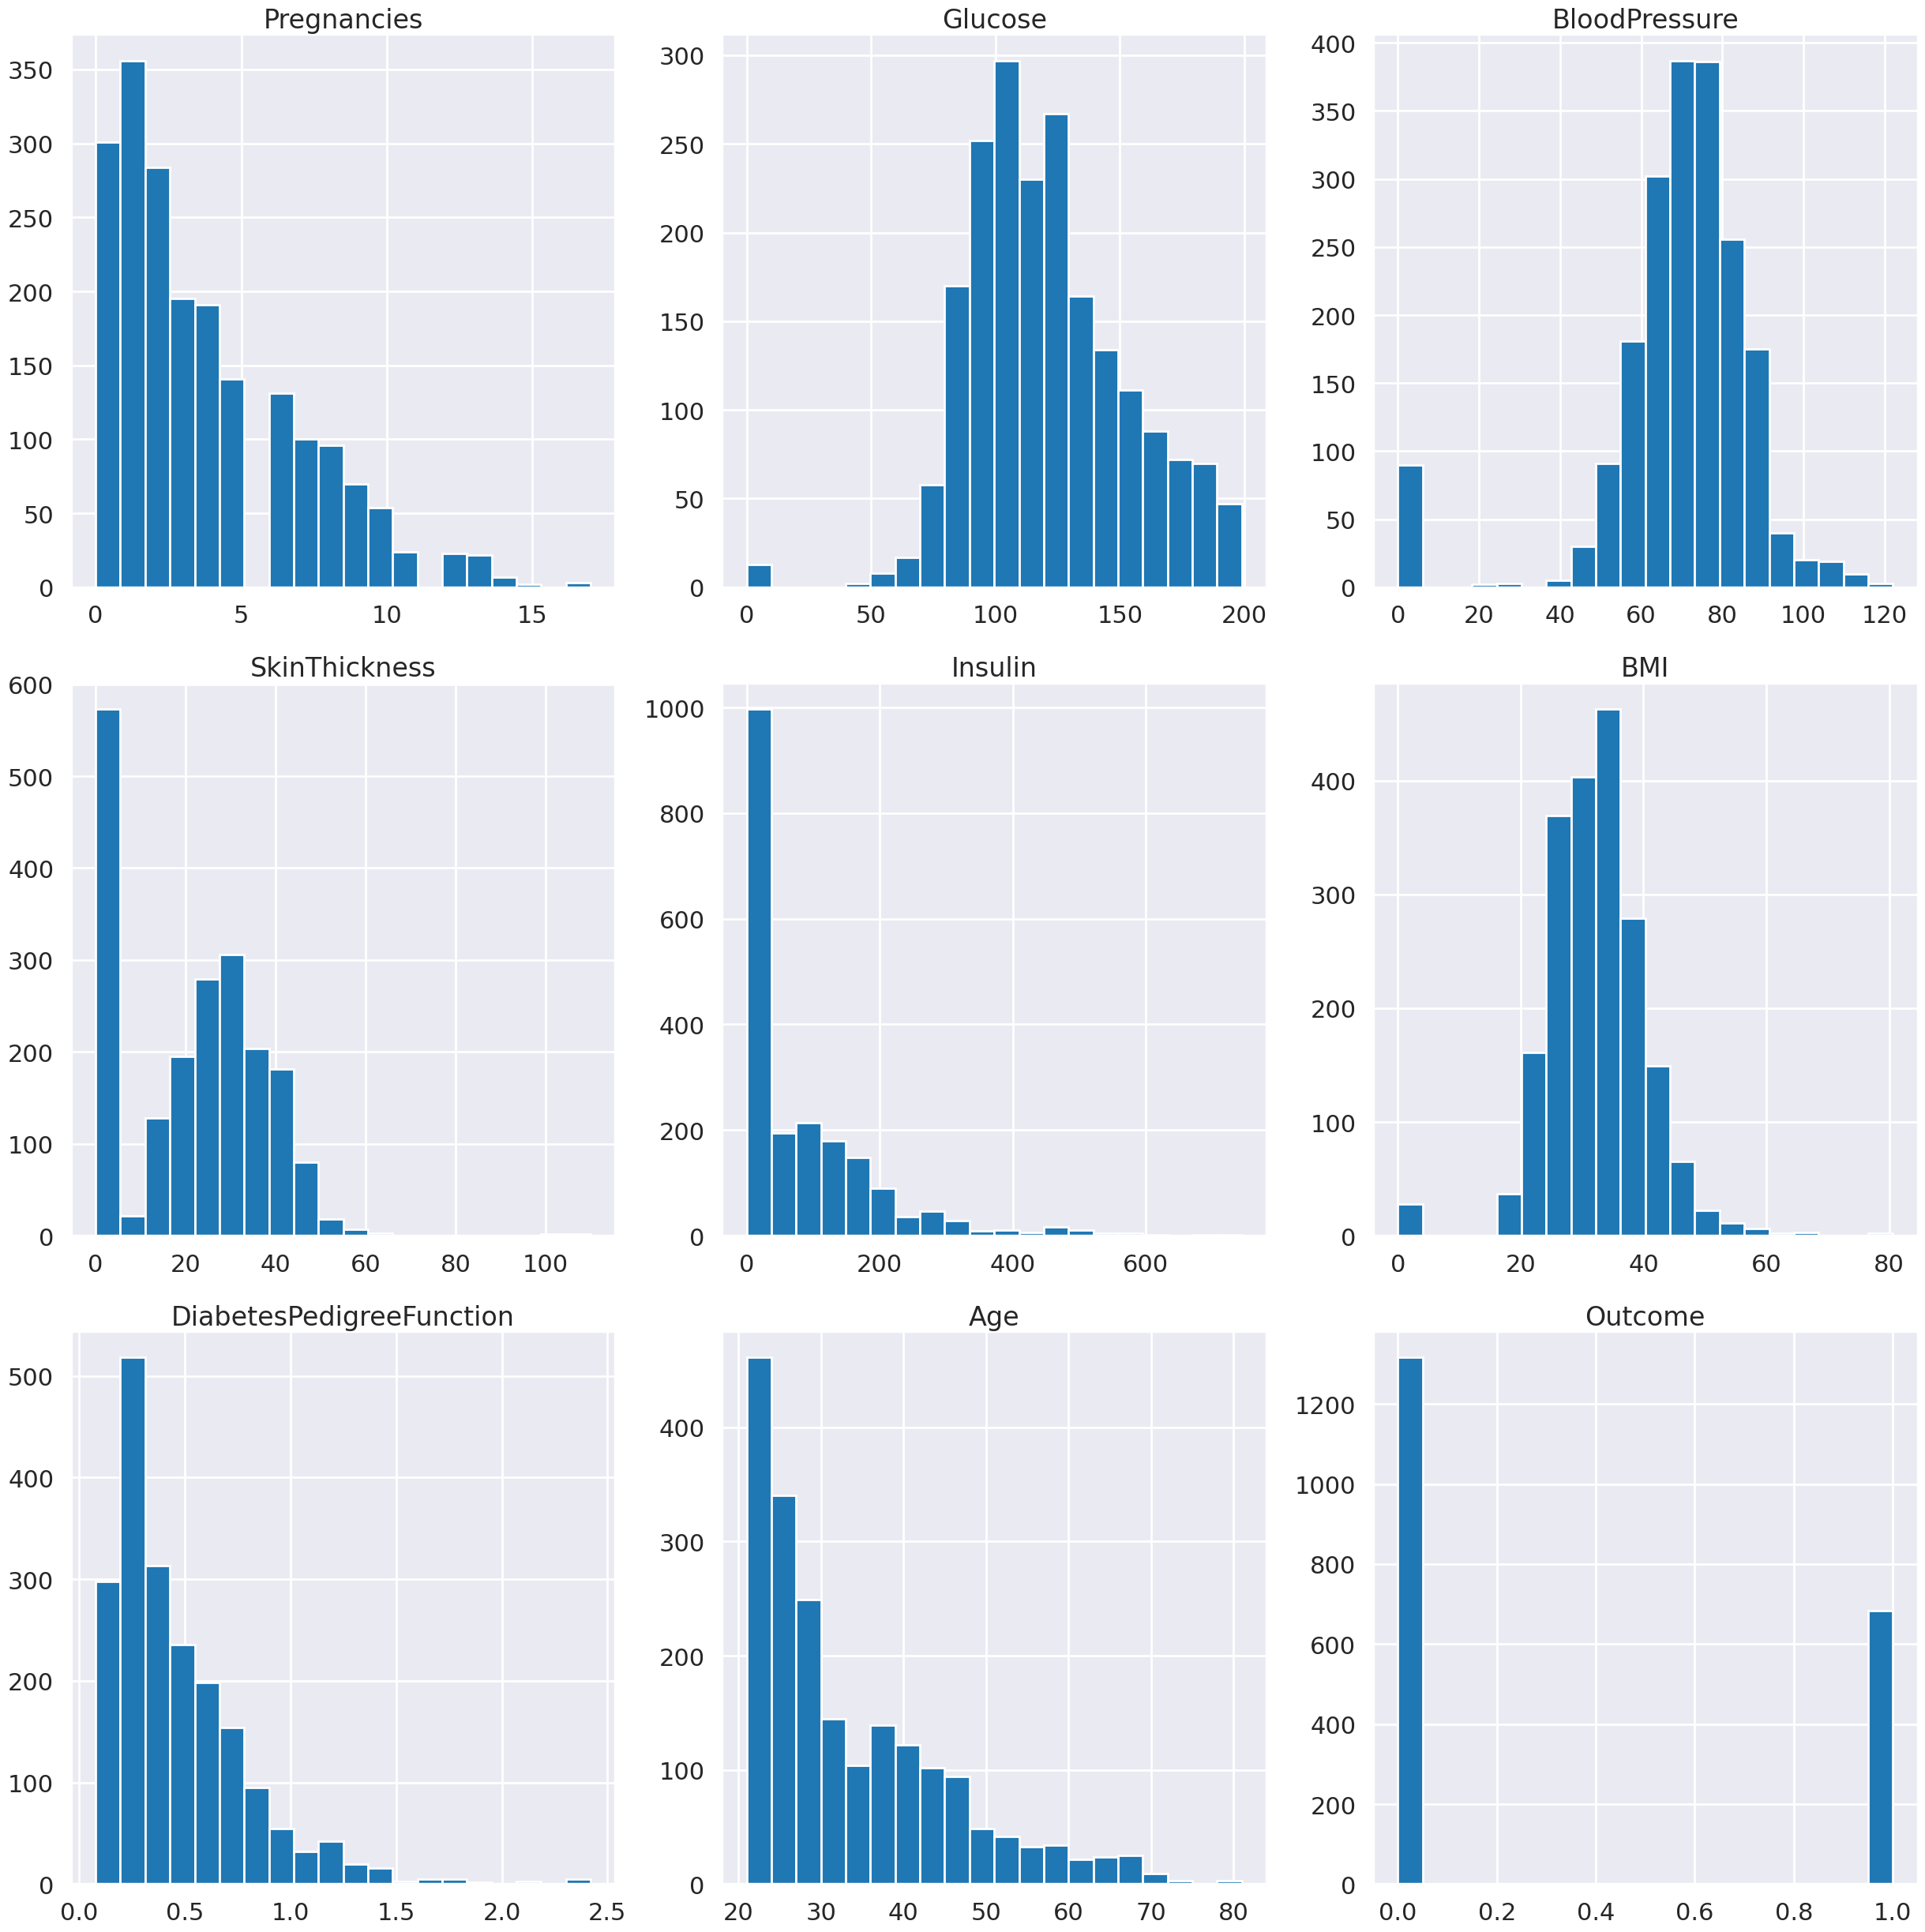

In [530]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

### также присутствуют дисбалансы по возрасту (24года), толщине кожи (<10) и беременностям (<3)

In [563]:
# комбинированные распределения по другим фичам

el = alt.selection_point(fields=["Outcome"])
c1= alt.Chart(df).mark_circle().encode(
    x="Age",
    y="Pregnancies",
    color=alt.Color('Outcome')
)
c2= alt.Chart(df).mark_circle().encode(
    x="Glucose",
    y="Insulin",
    color=alt.Color('Outcome')
)
c3= alt.Chart(df).mark_circle().encode(
    x="Age",
    y="BMI",
    color=alt.Color('Outcome')
)
c1&c2&c3

alt.VConcatChart(...)

#### график показывает, что диабет напрямую связан с количеством глюкозы в крови

### обработайте аномалии и нормализуйте данные, если это необходимо.

In [532]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


#### данные необходимо нормализовать, т.к. максимальные значения колонок отличаются на несколько порядков: Glucose	vs DiabetesPedigreeFunction	(199 vs 2,42)

In [533]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [534]:
# для X выберем все колонки кроме целевой
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
# X = df.drop(['Outcome'],axis = 1)
y =df['Outcome']

In [535]:
# попробуем сбалансировать классы  до всех манипуляций

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=40)
# X,y =ros.fit_resample(X, y)


# x_ros,y_ros =ros.fit_resample(X, y)
# from imblearn.under_sampling import RandomUnderSampler

In [536]:
# нормализуем 

from sklearn.preprocessing import StandardScaler
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X.values)
scaled_X = pd.DataFrame(scaled_data, index=X.index, columns=X.columns)
scaled_X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409
3,-1.120495,0.430980,-0.059713,1.308449,1.527142,1.240448,-0.327478,-0.771462
4,-0.817945,0.555744,-0.372481,1.246334,3.596367,1.044077,0.201161,-1.026055


In [537]:
# соберем в датафрейм с целевыми показателями
scaled_df = pd.concat([scaled_X, y], axis=1)
scaled_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.515394,0.524553,-0.372481,0.873645,-0.722016,0.172683,-1.063246,1.180424,1
1,-1.120495,-1.159756,0.670080,0.625186,0.402563,0.737249,-0.735551,-0.856326,0
2,-1.120495,0.742890,-3.604422,-1.300374,-0.722016,1.473638,0.491759,-0.177409,1


In [538]:
# сравним с обычными  данными
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1


### сравним матрицы корреляций для ненормалихованных данных и нормализованных

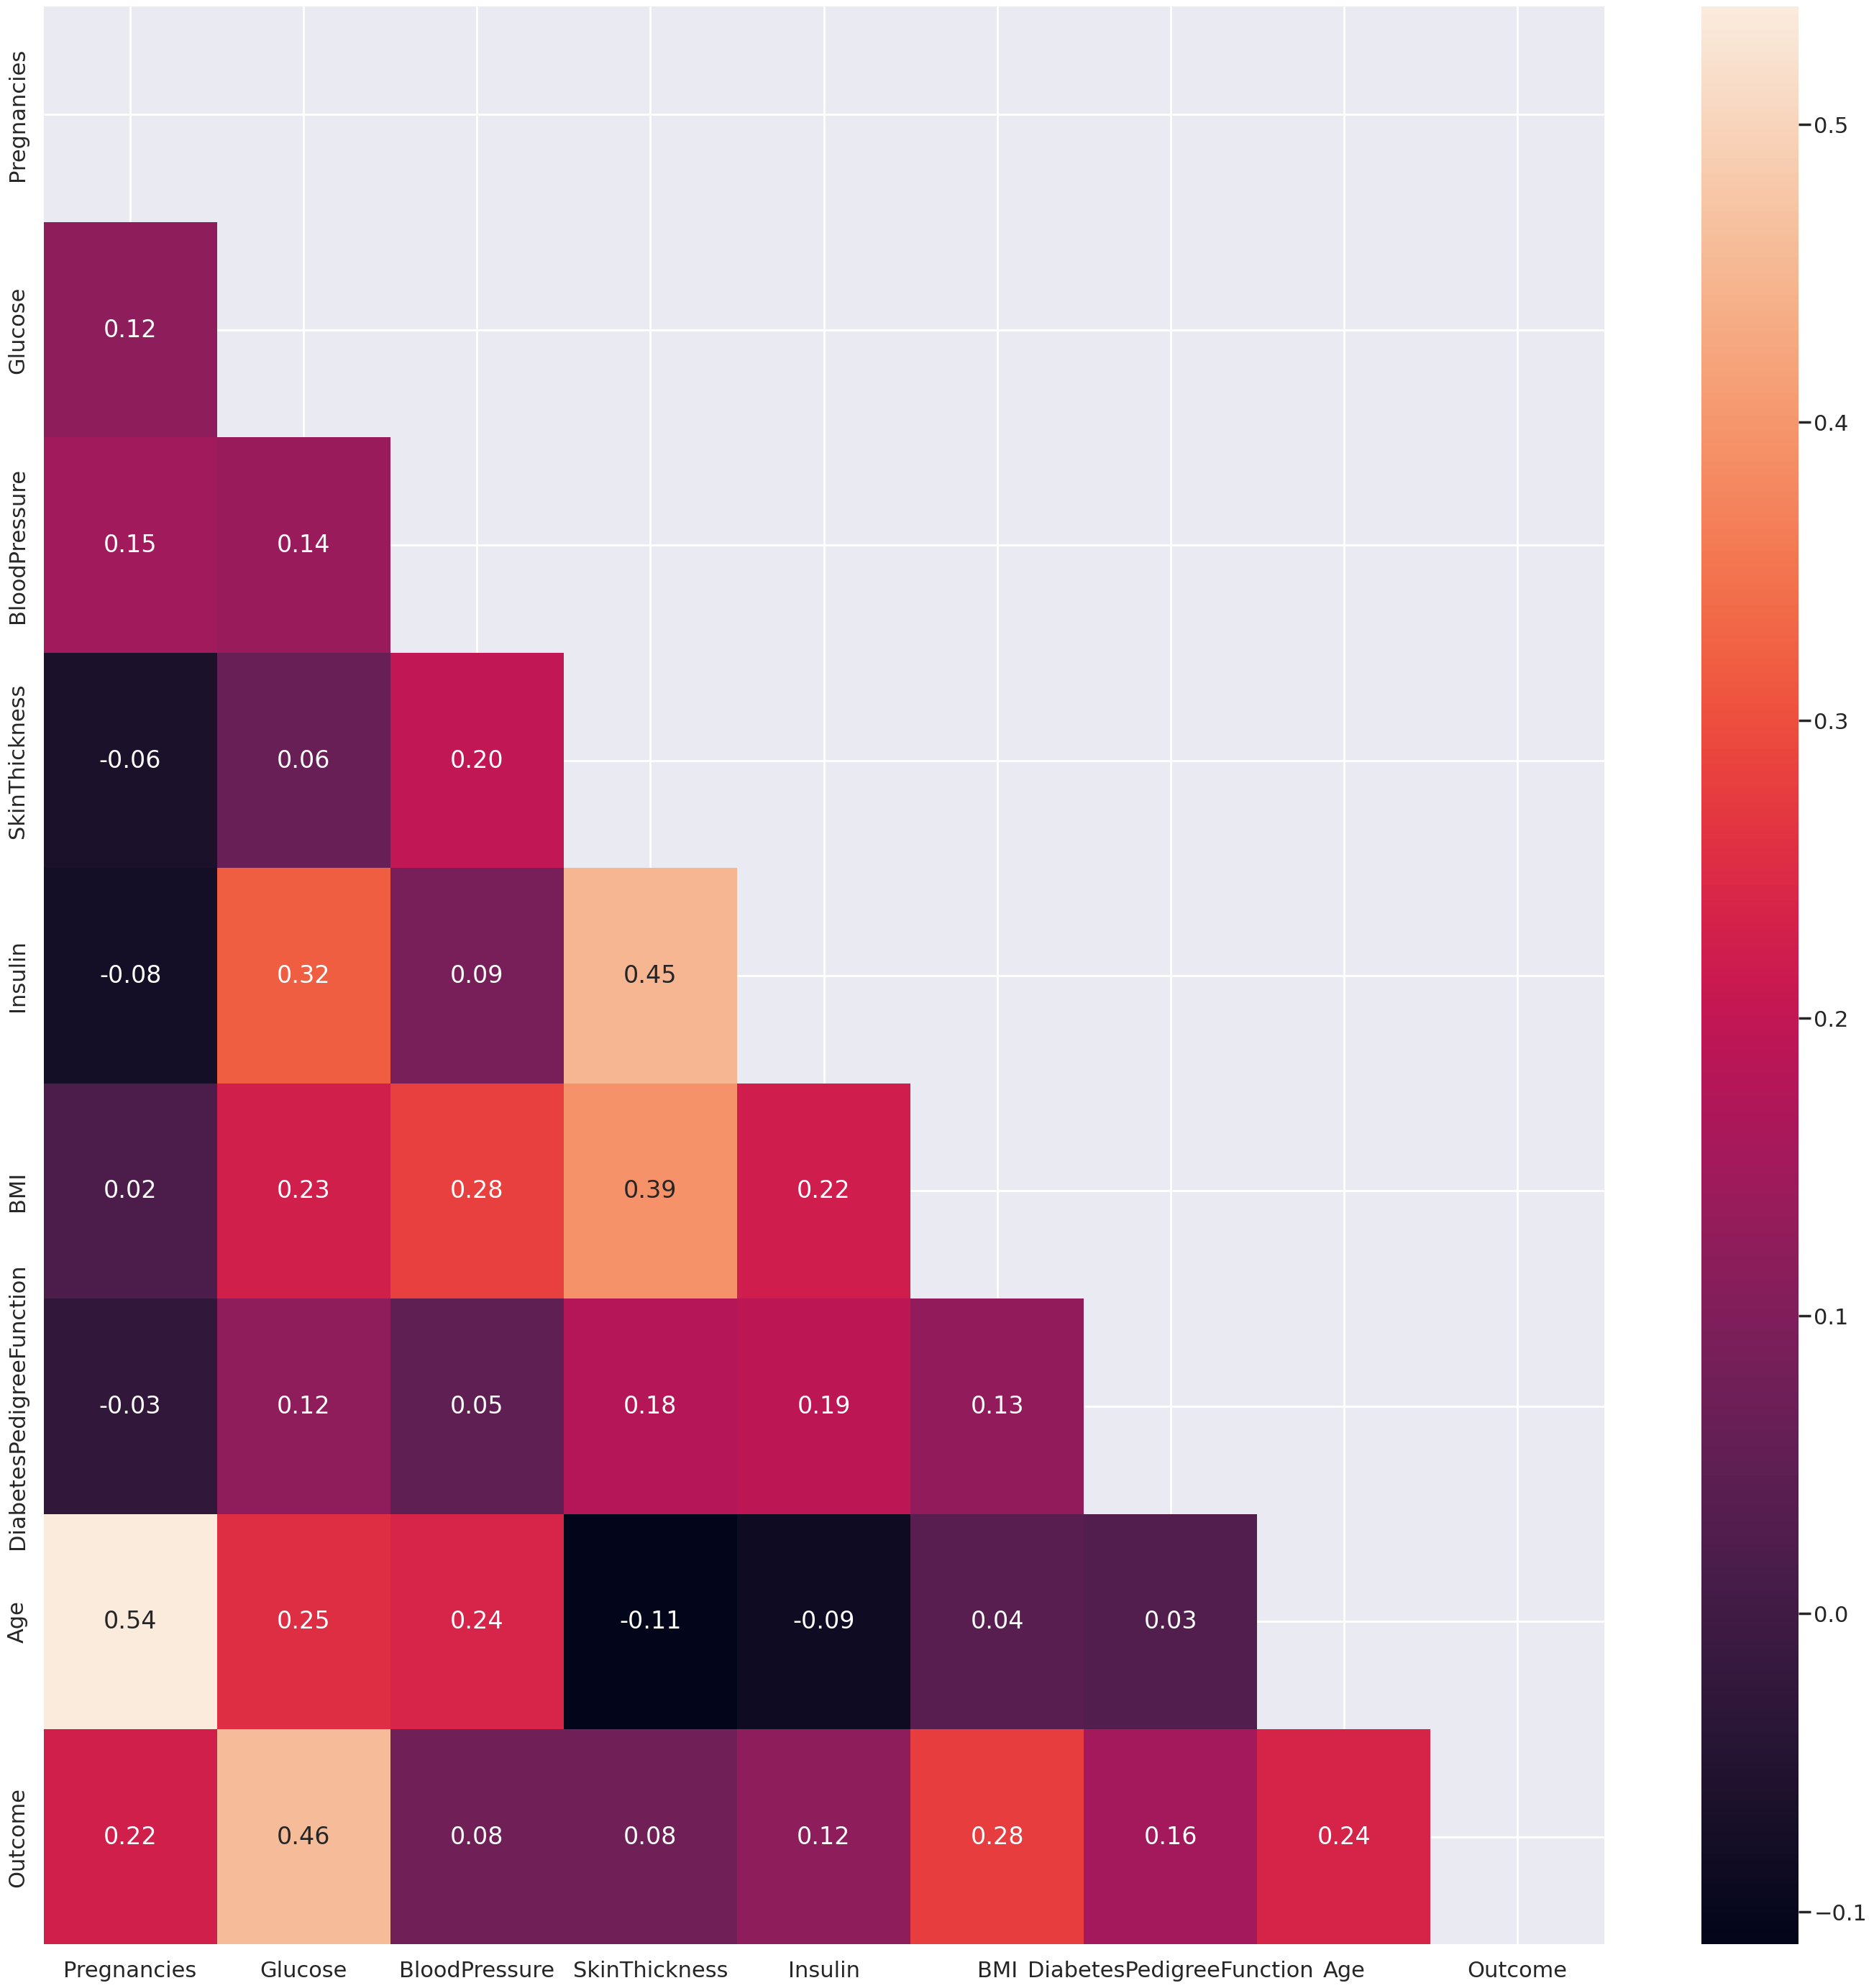

In [539]:
# матрица корреляций для ненормализованных данных
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()

#### корреляция диабета (outcome) только с уровнем глюкозы (прямая)
#### логичная корреляция количества беременностей с возрастом (прямая)
#### толщина кожи напрямую зависит ИМТ  и количеством инсулина

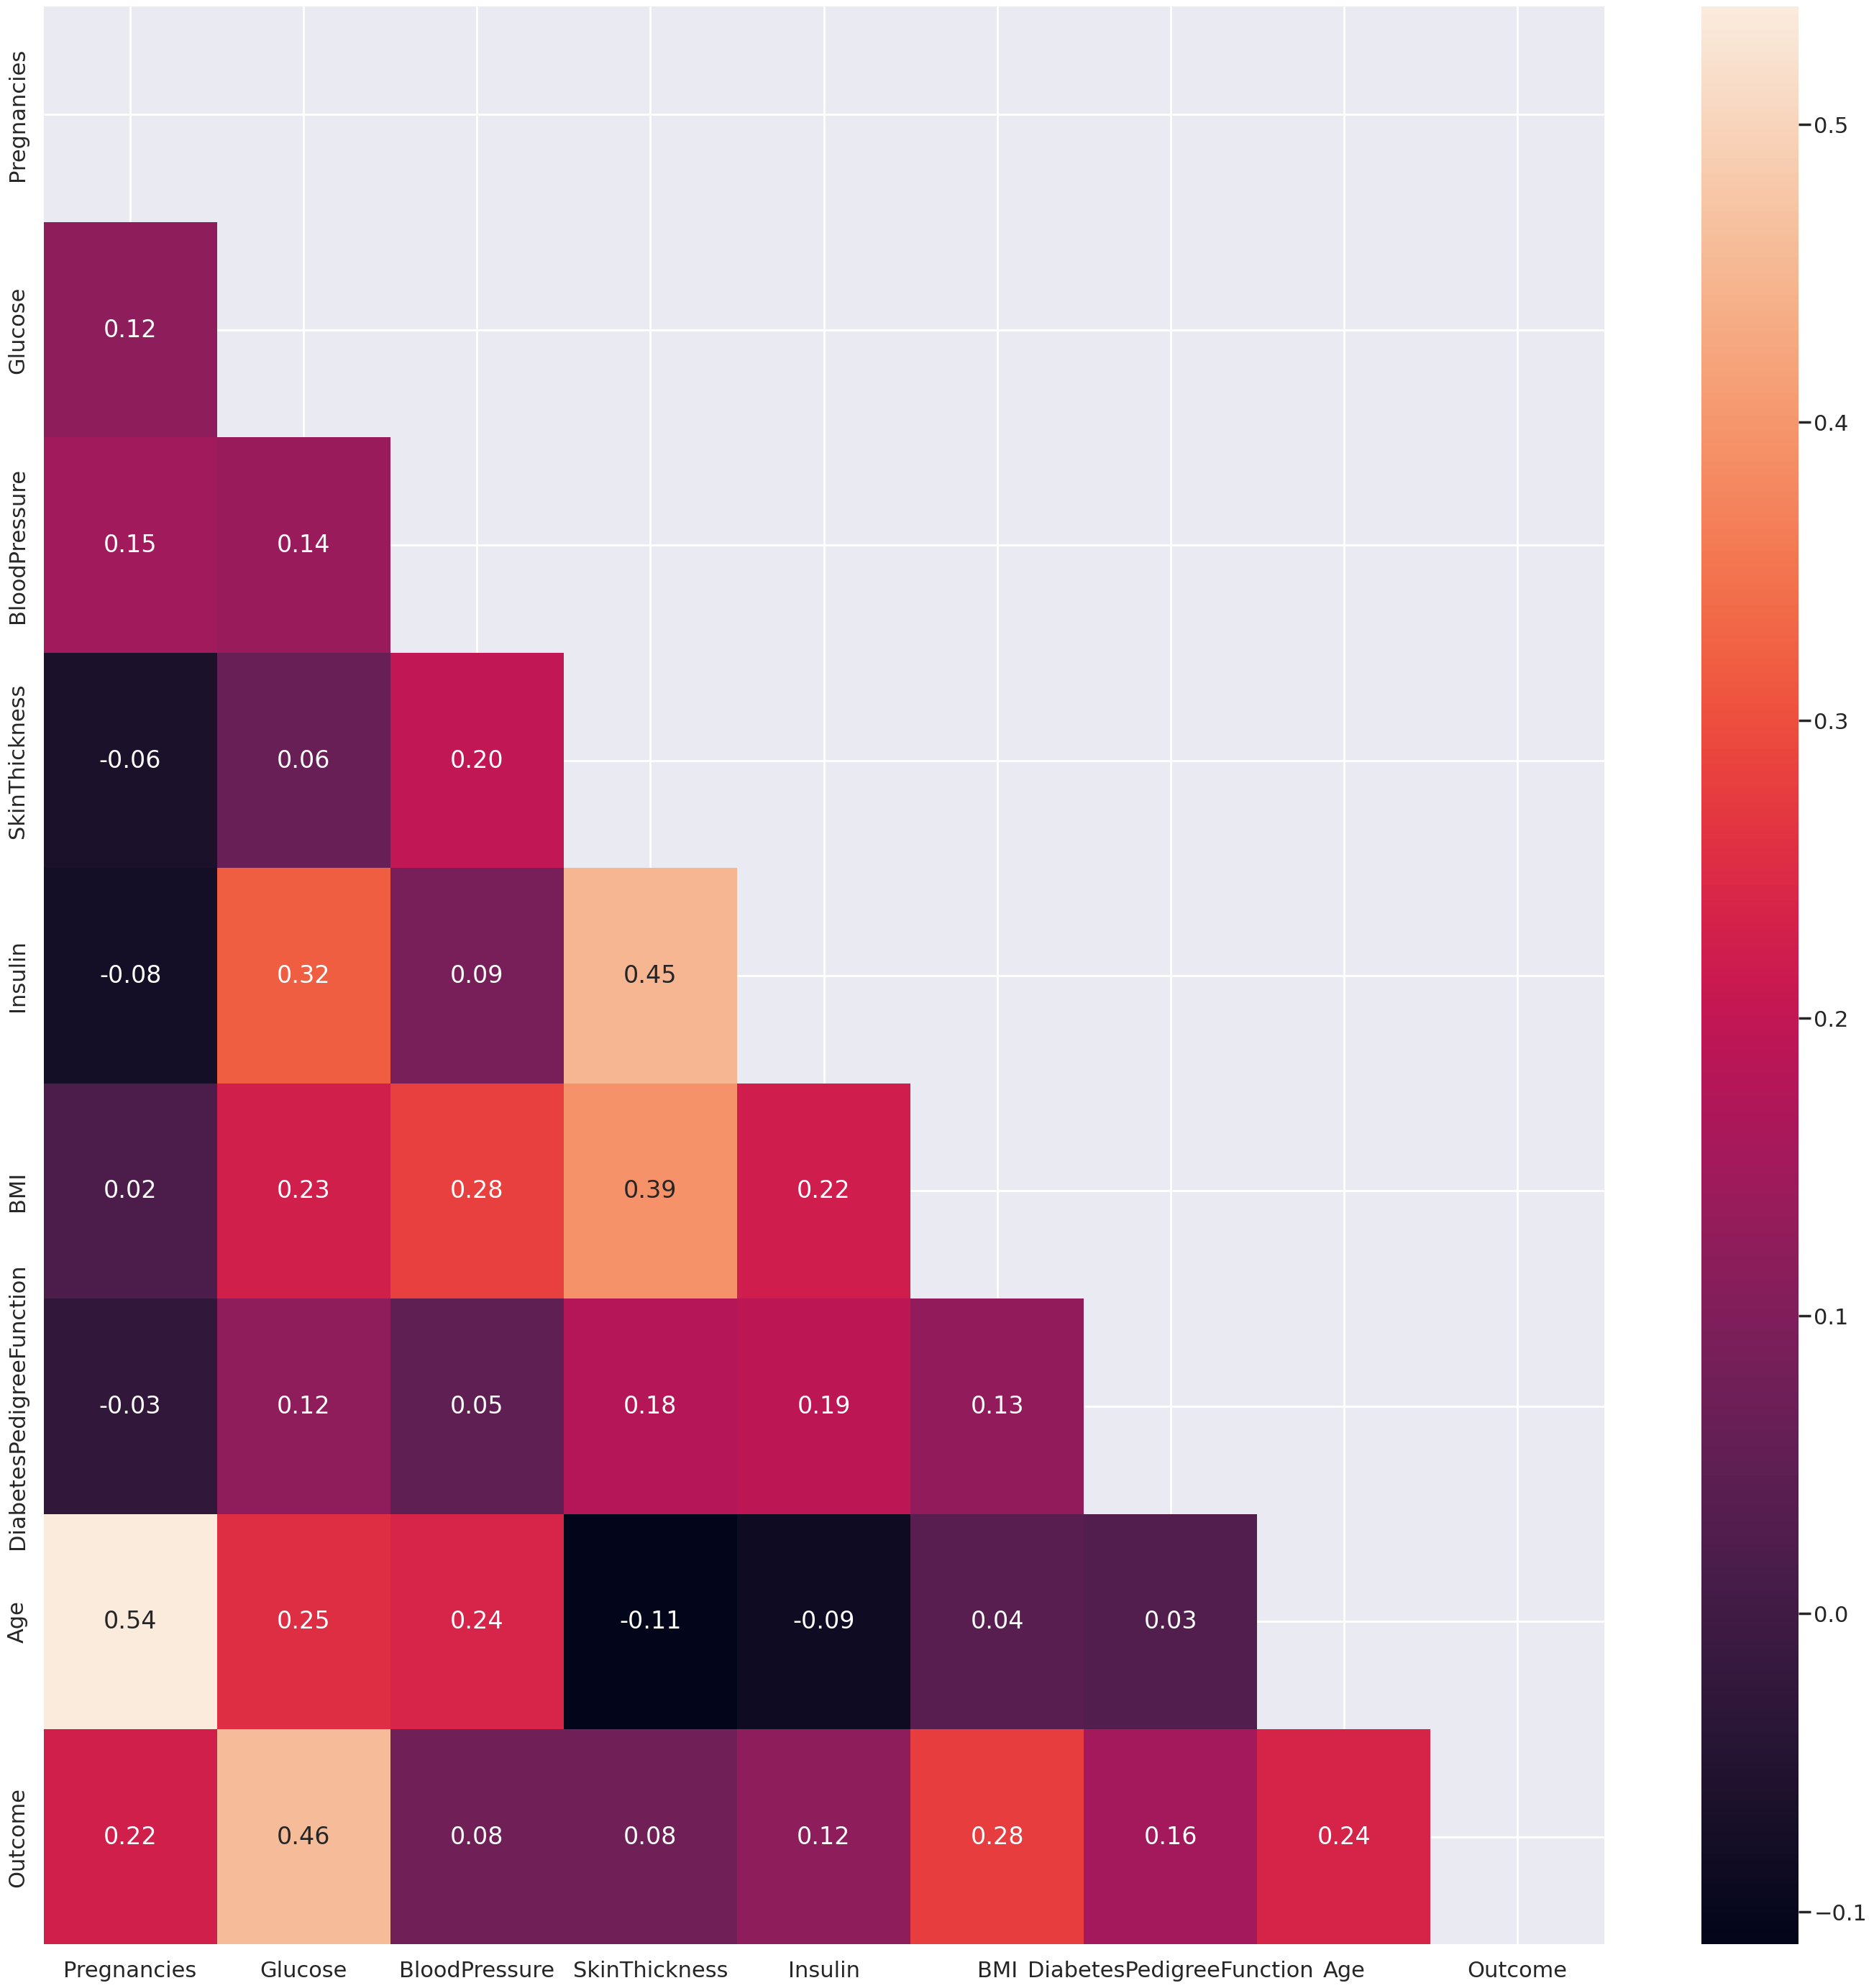

In [540]:
# строим корреляционную матрицу для нормализованных данных
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(scaled_df.corr(), dtype=bool))
sns.heatmap(scaled_df.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()


### как мы видим, нормализация никак не влияет на корреляционную матрицу

### - Разделите датасет на обучающую и тестовую выборки.

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
train_df_size = 0.8
seed = 42
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, y, train_size=train_df_size, random_state=seed)
# создадим параллельно датасет ненормализованный
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_df_size, random_state=seed)


In [542]:
# ненормированные данные
X_test.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1860,4,111,72,47,207,37.1,1.390,56
353,1,90,62,12,43,27.2,0.580,24
1333,8,179,72,42,130,32.7,0.719,36


In [543]:
y_test.head()

1860    1
353     0
1333    1
905     1
1289    1
Name: Outcome, dtype: int64

In [544]:
len(y_test)

400

In [545]:
# нормированные данные
scaled_X_test.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1860,0.089706,-0.317601,0.148800,1.619023,1.140287,0.602244,2.841269,1.944206
353,-0.817945,-0.972611,-0.372481,-0.554996,-0.335160,-0.612799,0.337186,-0.771462
1333,1.299907,1.803381,0.148800,1.308449,0.447546,0.062225,0.766899,0.246914


In [546]:
scaled_y_test.head()

1860    1
353     0
1333    1
905     1
1289    1
Name: Outcome, dtype: int64

In [547]:
# сбалансируем начальную выборку
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train)

In [548]:
X_train_resh.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,195,70,33,145,25.1,0.163,55
1,1,91,64,24,0,29.2,0.192,21
2,5,0,80,32,0,41.0,0.346,37


In [549]:
# проверим, что классы сбалансированы
y_train_resh.describe()

count    2126.000000
mean        0.500000
std         0.500118
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: Outcome, dtype: float64

## - Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
## - Обучите модель на обучающем наборе данных.

In [550]:
# Создание и обучение модели логистической регрессии
from sklearn.linear_model import LogisticRegression
# без нормализации выдает ошибку, пришлось изменить методы оптимизации
lg = LogisticRegression(solver='lbfgs', max_iter=1000)
model_1 = lg.fit(X_train, y_train)

# После обучения модели можно получить коэффициенты\
tuple(zip(list(X_train.columns), [round(float(x), 3) for x in lg.coef_[0]]))


(('Pregnancies', 0.122),
 ('Glucose', 0.033),
 ('BloodPressure', -0.01),
 ('SkinThickness', 0.006),
 ('Insulin', -0.002),
 ('BMI', 0.08),
 ('DiabetesPedigreeFunction', 0.662),
 ('Age', 0.014))

In [551]:
# Создание и обучение модели логистической регрессии на сбалансированных данных
from sklearn.linear_model import LogisticRegression
# без нормализации выдает ошибку, пришлось изменить методы оптимизации
lg_bal = LogisticRegression(solver='lbfgs', max_iter=1000)
model_bal = lg_bal.fit(X_train_resh, y_train_resh)

# После обучения модели можно получить коэффициенты\
tuple(zip(list(X_train_resh.columns), [round(float(x), 3) for x in lg_bal.coef_[0]]))


(('Pregnancies', 0.136),
 ('Glucose', 0.034),
 ('BloodPressure', -0.011),
 ('SkinThickness', 0.005),
 ('Insulin', -0.001),
 ('BMI', 0.092),
 ('DiabetesPedigreeFunction', 0.816),
 ('Age', 0.013))

### на сбалансированных данных коэффициенты изменились

In [552]:
# Создание и обучение модели логистической регрессии
from sklearn.linear_model import LogisticRegression
lg_scaled = LogisticRegression()
model_scaled = lg_scaled.fit(scaled_X_train, scaled_y_train)

# После обучения модели можно получить коэффициенты\

tuple(zip(list(X_train.columns), [round(float(x), 2) for x in lg_scaled.coef_[0]]))

(('Pregnancies', 0.4),
 ('Glucose', 1.07),
 ('BloodPressure', -0.2),
 ('SkinThickness', 0.09),
 ('Insulin', -0.19),
 ('BMI', 0.65),
 ('DiabetesPedigreeFunction', 0.22),
 ('Age', 0.17))

### коэффициенты  изменились, т.к. после нормализации изменились значения колонок
### видим, что наибольшие коэффициенты у уровня глюкозы и ИМТ

In [553]:
# попробуем нормализовать сбалансированные данные
scaled_bal_data = scaler.fit_transform(X_train_resh.values)
scaled_bal_X = pd.DataFrame(scaled_bal_data, index=X_train_resh.index, columns=X_train_resh.columns)
scaled_bal_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.891979,2.100444,-0.001688,0.712442,0.517003,-1.015819,-0.986756,1.940088
1,-0.873434,-1.045157,-0.322979,0.146570,-0.751030,-0.489356,-0.897323,-1.132260


In [554]:
# и обучить модель на них
lg_bal_scaled = LogisticRegression()
model_bal_scaled = lg_bal_scaled.fit(scaled_bal_X, y_train_resh)

# После обучения модели можно получить коэффициенты\

tuple(zip(list(scaled_bal_X.columns), [round(float(x), 2) for x in lg_bal_scaled.coef_[0]]))

(('Pregnancies', 0.46),
 ('Glucose', 1.11),
 ('BloodPressure', -0.2),
 ('SkinThickness', 0.07),
 ('Insulin', -0.16),
 ('BMI', 0.71),
 ('DiabetesPedigreeFunction', 0.27),
 ('Age', 0.15))

## - Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [555]:
len(y_pred)

400

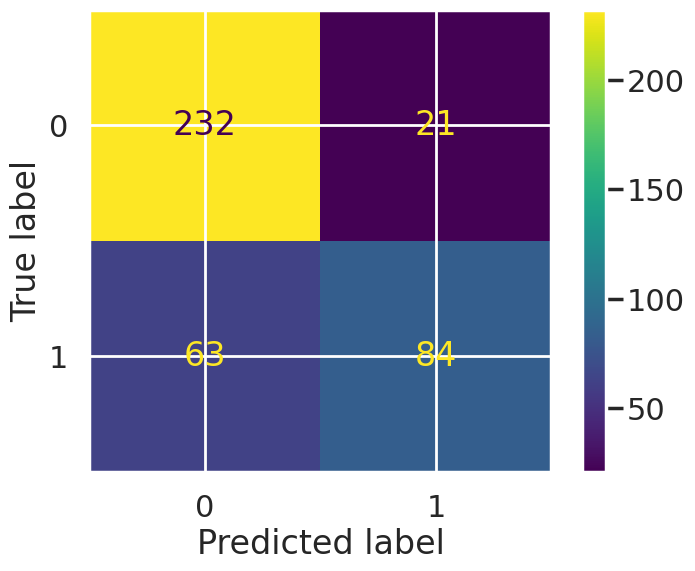

In [556]:
# построим матрицу для начальной модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model_1.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# disp.plot()


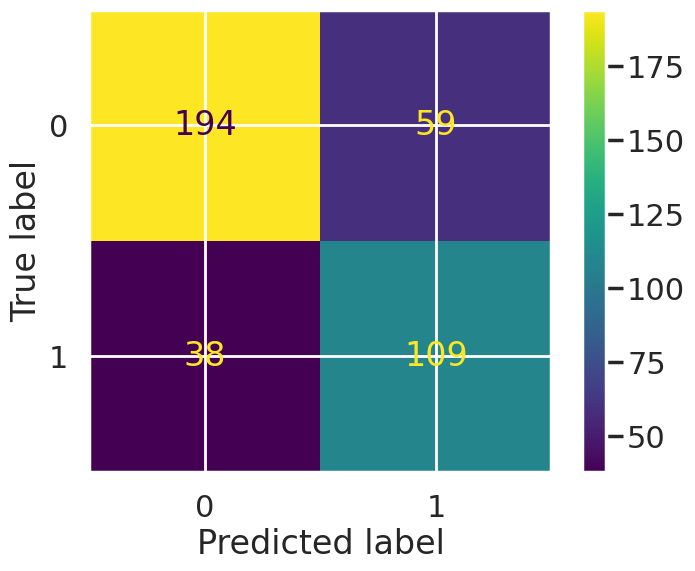

In [557]:
# построим матрицу для начальной модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model_bal.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# disp.plot()


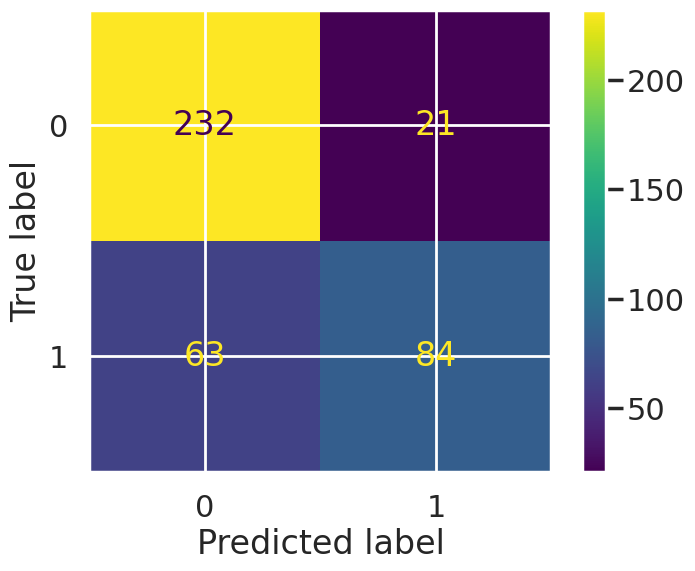

In [558]:
# построим матрицу для нормализованной модели
from sklearn.metrics import confusion_matrix
y2_pred = model_scaled.predict(scaled_X_test)
disp = ConfusionMatrixDisplay.from_predictions(scaled_y_test, y2_pred)
# disp.plot()

### как видим, модель, обучившаяся на нормализованной модели, почти не отличается по производительности от ненормализованной

/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


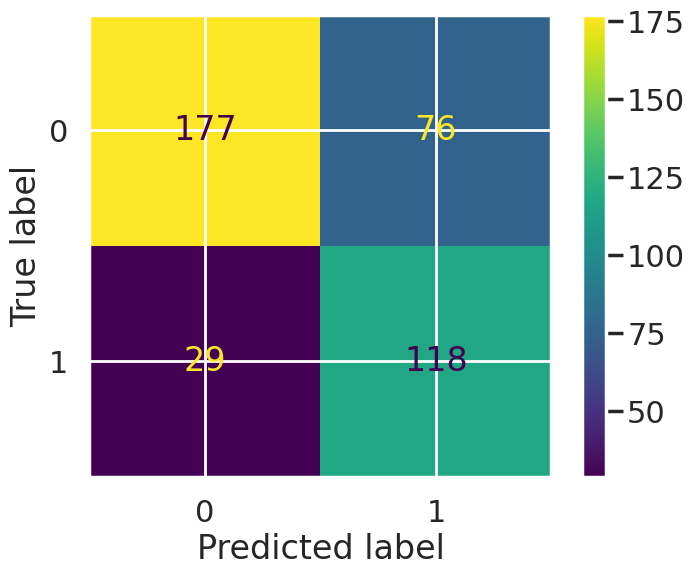

In [559]:
# построим матрицу для сбалансированной нормализованной модели
from sklearn.metrics import confusion_matrix
bal_scaled_X_test = scaler.fit_transform(scaled_X_test)
y3_pred = model_bal_scaled.predict(bal_scaled_X_test)
disp = ConfusionMatrixDisplay.from_predictions(scaled_y_test, y3_pred)
# disp.plot()

In [560]:
# соберем данные в один датафрейм
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Model 1': model_1,
    'Model 2': model_scaled,
    'Model 3': model_bal,
    'Model 4': model_bal_scaled
}

models_name = {
    'Model 1': "модель, обученная на X_train",
    'Model 2': "модель, обученная на нормализованных данных scaled_X_train (<-X_train)",
    'Model 3': "модель, обученная на сбалансированных данных X_train_resh (<-X_train)",
    'Model 4': "модель, обученная на сбалансированных нормализованных данных scaled_bal_X (<-X_train_resh)",
}

test_datasets = {
    'Model 1': X_test,
    'Model 2': scaled_X_test,
    'Model 3': X_test,
    'Model 4': bal_scaled_X_test

}

test_target = {
    'Model 1': y_test,
    'Model 2': scaled_y_test,
    'Model 3': y_test,
    'Model 4': scaled_y_test
}

results = []

for model_name, model in models.items():
    model_x_test = test_datasets.get(model_name)
    model_target_test = test_target.get(model_name)
    model_y_pred = model.predict(model_x_test)
    scores = [
        accuracy_score(model_target_test, model_y_pred),
        precision_score(model_target_test, model_y_pred, average='binary', zero_division=1),
        recall_score(model_target_test, model_y_pred, average='binary'),
        f1_score(model_target_test, model_y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [561]:
models_name

{'Model 1': 'модель, обученная на X_train',
 'Model 2': 'модель, обученная на нормализованных данных scaled_X_train (<-X_train)',
 'Model 3': 'модель, обученная на сбалансированных данных X_train_resh (<-X_train)',
 'Model 4': 'модель, обученная на сбалансированных нормализованных данных scaled_bal_X (<-X_train_resh)'}

In [562]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.7900,0.800000,0.571429,0.666667
Model 2,0.7900,0.800000,0.571429,0.666667
Model 3,0.7575,0.648810,0.741497,0.692063
Model 4,0.7375,0.608247,0.802721,0.692082


при проверке моделей на тестовой выборке получаем следующие значения:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Model 1</th>
      <td>0.7900</td>
      <td>0.800000</td>
      <td>0.571429</td>
      <td>0.666667</td>
    </tr>
    <tr>
      <th>Model 2</th>
      <td>0.7900</td>
      <td>0.800000</td>
      <td>0.571429</td>
      <td>0.666667</td>
    </tr>
    <tr>
      <th>Model 3</th>
      <td>0.7600</td>
      <td>0.652695</td>
      <td>0.741497</td>
      <td>0.694268</td>
    </tr>
    <tr>
      <th>Model 4</th>
      <td>0.7625</td>
      <td>0.639785</td>
      <td>0.809524</td>
      <td>0.714715</td>
    </tr>
  </tbody>
</table>
</div>

если сбалансировать выборку в самом начале то получатся следующие коэффициенты

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Model 1</th>
      <td>0.757116</td>
      <td>0.792683</td>
      <td>0.716912</td>
      <td>0.752896</td>
    </tr>
    <tr>
      <th>Model 2</th>
      <td>0.757116</td>
      <td>0.790323</td>
      <td>0.720588</td>
      <td>0.753846</td>
    </tr>
    <tr>
      <th>Model 3</th>
      <td>0.762808</td>
      <td>0.795181</td>
      <td>0.727941</td>
      <td>0.760077</td>
    </tr>
    <tr>
      <th>Model 4</th>
      <td>0.747628</td>
      <td>0.783673</td>
      <td>0.705882</td>
      <td>0.742747</td>
    </tr>
  </tbody>
</table>
</div>

## - Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.


Выводы:
модели, обученные на несбалансированных данных обучились эффективно определять отсутствие диабета (0) т.к. precision =0.8, о при этом отбрасывает очень много больных при определении диабета т.к. recall=0.57
поэтому данная модель не применима для определения заболевших диабетом
при этом модель не удается улучшить с помощью нормализации данных и F1 все равно будет меньше 0.7

Для исправления ситуации, можно сбалансировать классы и отнормировать данные на самом старте обучения, тогда улучшится recall (полнота) до 0,7 и общий показатель F1 увеличится до 0,76

### *для улучшения показателей данного датасета необходимо применять модель деревьев, которые дают F1 до 0.82*

##    - Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.
согласно корелляционной матрице: основным фактором определяющим наличие диабета является уровень сахара в крови

согласно комбинированным данным: повышенное содержание инсулина + сахара увеличивают шансы на диабет, также как возраст + высокий ИМТ